In [6]:
#!/usr/bin/env python
""" 
"""
__author__ = 'Adam Duster'
__copyright__ = ''
__credits__ = ['Adam Duster']
__license__ = 'CC-BY-SA'
__version__ = '0.1'
__email__ = 'adam.duster@ucdenver.edu'
__status__ = 'Development'

import argparse
import h5py as h5
import numpy as np

def get_args(args=None):
    """ This is written as a default funtion to put at beginning of all Python
    scripts which require command line arguments. This uses the argparse module
    which must be declared in the main program to ensure that the object is able
    to be used by the caller
    --Adam Duster 21 June 2017
    """
    parser = argparse.ArgumentParser(description='see header of python script')
    parser.add_argument(
        '-i',
        '--if_paths',
        help='The first and second files in order',
        required=True)
    parser.add_argument(
        '-v',
        '--verbose',
        help='Controls the level of output, use multipe v for more output',
        required=False,
        action='count',
        default=0)
    parser.add_argument(
        '-s',
        '--step',
        help='The change in coordinates between the two files',
        required=False,
        default=1e-6,
        type=float
    )
    parser.add_argument(
        '-d',
        '--debug',
        help='Enter debug mode',
        required=False,
        action='store_true',
        default=False)
    return parser.parse_args(args)

## Vars
arg_vals = None
args = get_args(['-i', 'h2o-bpsf.h5','-s', '1e-4', '-d'])

test = 2

# different tests to examine. ind refers to structure
# f is first, n is next  
f = 0
if test == 0:
    print("Test by changing theta by %f" % args.step)
    n = 1
if test == 1:
    print("Test by changing x of H1 (2nd atom) by %f" % args.step)
    n = 2
if test == 2:
    print("Test by changing y of H1 (2nd atom) by %f" % args.step)
    n = 3
if test == 1:
    print("Test by changing z of H1 (2nd atom) by %f" % args.step)
    n = 4
if test == 1:
    print("Test by changing x of H2 (3rd atom) by %f" % args.step)
    n = 5
if test == 1:
    print("Test by changing y of H2 (3rd atom) by %f" % args.step)
    n = 6
if test == 1:
    print("Test by changing z of H2 (3rd atom) by %f" % args.step)
    n = 7
if test == 1:
    print("Test by changing x of O (1st atom) by %f" % args.step)
    n = 8
if test == 1:
    print("Test by changing y of O (1st atom) by %f" % args.step)
    n = 9
if test == 1:
    print("Test by changing z of O (1st atom) by %f" % args.step)
    n = 10
# There should only be 1 set of angular symmetry funcitons
# Lets verify this and then select them.
key = 'o_angular_sym_funcs'
ckey = 'o_ang_cartesian_gradient'
check = False
check = True
print(args.if_paths)
k = 0
#bf_slice = np.arange(-18, 0, 1)
bf_slice = np.asarray(-18)
nsf = bf_slice.size
debug = True
with h5.File(args.if_paths, 'r') as nfi:
    if args.debug:
        print('KEYS IN H5 file: ', list(nfi.keys()))
        dims = nfi[key].shape
        cdims = nfi[ckey].shape
        print("ang basis array dimensions: ", dims)
        print("ang grad array dimensions: ", cdims)
        print("reference angular bpsf: ", nfi[key][0,:])
    if check:
        for i in range(dims[1]):
            if not np.isclose(nfi[key][f,i].any(), nfi[key][n, i].any(), 1e-5):
                print(i, j)
                k += 1
    print(nfi[key][f,bf_slice])
    delta_symfuncs = np.reshape((nfi[key][n,bf_slice] - nfi[key][f,bf_slice] ) / args.step, [1])
    calc = nfi[ckey][f,bf_slice,:3,:]

Test by changing y of H1 (2nd atom) by 0.000100
h2o-bpsf.h5
KEYS IN H5 file:  ['h_ang_cartesian_gradient', 'h_angular_sym_funcs', 'h_basis_to_molecule', 'h_rad_cartesian_gradient', 'h_radial_sym_funcs', 'molecule_to_basis_inds', 'o_ang_cartesian_gradient', 'o_angular_sym_funcs', 'o_basis_to_molecule', 'o_rad_cartesian_gradient', 'o_radial_sym_funcs']
ang basis array dimensions:  (14, 54)
ang grad array dimensions:  (14, 54, 3, 3)
reference angular bpsf:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000

In [8]:
for i in range(nsf):
    print(delta_symfuncs[i])
    print(calc[:].sum())
    #print(delta_symfuncs[i], calc[i], calc[i]-delta_symfuncs[i], (calc[i]-delta_symfuncs[i])/delta_symfuncs[i])

-0.7748542038710227
4.440892098500626e-16


In [9]:
print(calc[:])

[[ 1.072823    1.072823    0.        ]
 [-0.14454759 -0.92827541  0.        ]
 [-0.92827541 -0.14454759  0.        ]]


In [12]:
with h5.File(args.if_paths, 'r') as nfi:
    f = nfi[key][f,bf_slice]
    n = nfi[key][n,bf_slice]
    print("bf {0:10.8f} changed to {1:10.8f}".format(f, n))
    print("delta: {0:10.8f}".format(n-f))

bf 0.84587661 changed to 0.84579912
delta: -0.00007749


In [14]:
for i in range(delta_symfuncs.size):
    if delta_symfuncs[i] == 0 and calc[i] == 0:
        continue
    diff = calc[i]-delta_symfuncs[i]
    ref = delta_symfuncs[i]
    print("Numerical calculation:  ", delta_symfuncs[i])
    print("Analytical calculation: ", calc[i])
    print("Difference (A-N):  ", calc[i]-delta_symfuncs[i])
    print("% Difference: {0:.0%}".format(diff[i]/ref[i]) )
    print(delta_symfuncs[i], calc[i], (calc[i]-delta_symfuncs[i])/delta_symfuncs[i])

Numerical calculation:   -0.7748542038710227
Analytical calculation:  [1.072823 1.072823 0.      ]
Difference (A-N):   [1.8476772 1.8476772 0.7748542]


IndexError: invalid index to scalar variable.

In [15]:
delta_symfuncs[i].shape

()

In [16]:
for i in range(delta_symfuncs.size):
    if delta_symfuncs[i] == 0 and calc[i] == 0:
        continue
    print(delta_symfuncs[i], calc[i], (calc[i]-delta_symfuncs[i])/delta_symfuncs[i])

-0.7748542038710227 [1.072823 1.072823 0.      ] [-2.38454821 -2.38454821 -1.        ]


In [17]:
# Calculate the numerical gradient
import h5py as h5
import numpy as np

#key = 'o_rad_cartesian_gradient'
#key = 'h_radial_sym_funcs'
key = 'cartesian_coords'
check = False
check = True
f1 = 'step1_coords.h5'
f2 = 'step2_coords.h5'
print(args.if_paths[0])
print(args.if_paths[1])
k = 0
with h5.File(f1, 'r') as ffi, h5.File(f2, 'r') as nfi:
    if check:
        assert(nfi[key].shape[0] == ffi[key].shape[0])
        assert(nfi[key].shape[1] == ffi[key].shape[1])
        print("Shape to check: ", nfi[key].shape)
        for i in range(nfi[key].shape[0]):
            for j in range(nfi[key].shape[1]):
                for l in range(3):
                    if not np.isclose(nfi[key][i, j, l].any(), ffi[key][i, j, l].any(), 1e-7):
                        print(i, j, l)
                        k += 1
    print(nfi[key][1,:5])
    print(ffi[key][1,:5])
    print(list(nfi.keys()))
    delta_symfuncs = (nfi[key][:] - ffi[key][:] ) / args.step
print(k)

h
2


OSError: Unable to open file (unable to open file: name = 'step1_coords.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [18]:
key = 'cartesian_coords'
with h5.File('step1_coords.h5', 'r') as ffi, h5.File('step2_coords.h5', 'r') as nfi:
    print(nfi[key][0:2,:5])
    print(ffi[key][0:2,:5])

OSError: Unable to open file (unable to open file: name = 'step1_coords.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [87]:
npa = np.asarray
eta =  1e-3
zeta = 1.
lam = -1.
cos = 0.0
gauss = 0.98841082358278842
fc_prod = 0.85579455973278462

xi = npa([0., 0., 0.])
xj = npa([1., 0., 0.])
xk = npa([0., 1., 0.])
ref = [xi, xj, xk]
xi = npa([0., 0., 0.]) + 1e-5
deltai = [xi, xj, xk]

def get_geom_parameters(xi, xj, xk):
    rij = np.linalg.norm(xj - xi)
    rik = np.linalg.norm(xk - xi)
    rjk = np.linalg.norm(xk - xj)
    drijdi = -(xj - xi) / rij
    drijdj = -drijdi
    drikdi = -(xk - xi) / rik
    drikdk = -drikdi
    drjkdj = -(xk - xj) / rjk
    drjkdk = -drjkdj
    
    cos = np.dot(xi, xj) / (np.linalg.norm(xi)* np.linalg.norm(xj))
    
    return rij, rik, rjk, drijdi, drijdj, drikdi, drikdk, drjkdj, drjkdk, cos

rij, rik, rjk, drijdi, drijdj, drikdi, drikdk, drjkdj, drjkdk, cos = get_geom_parameters(*ref)

print(rij, rik, rjk)
print(drijdi, drijdj)
print(drikdi, drikdk)
print(drjkdj, drjkdk)

1.0 1.0 1.4142135623730951
[-1. -0. -0.] [1. 0. 0.]
[-0. -1. -0.] [0. 1. 0.]
[ 0.70710678 -0.70710678 -0.        ] [-0.70710678  0.70710678  0.        ]


/home/aduster/anaconda3/envs/mda/lib/python3.6/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in double_scalars


array([-1., -0., -0.])

In [50]:
# Check the derivative of the angle with resepct to cosine
s = 1e-6
a = ((1 + lam * cos) ** zeta)
b = ((1 + lam * (cos + s)) ** zeta)
print((b-a)/s)
assert np.isclose((b-a)/s, -1.0000000000000000)

-1.0000000000287557


In [89]:
# Calculate the gradient for the exponential term for XI
# Note that for the step, whether you should add or subtract x depends on
# wheter that decreases or increases rij. Here they will get closer so
# I subtract.
s = 1e-5
rij, rik, rjk, drijdi, drijdj, drikdi, drikdk, drjkdj, drjkdk, cos = get_geom_parameters(*ref)
a = np.exp(-eta * (rij + rik + rjk)**2)
print("gaussian before preturbing", a)
print( a * -2 * eta * (rij + rik + rjk) * (drijdi + drikdi))

rij, rik, rjk, drijdi, drijdj, drikdi, drikdk, drjkdj, drjkdk, cos = get_geom_parameters(*deltai)
b = np.exp(-eta * (rij + rik + rjk)**2)
print("gaussian after preturbing", b)
dgauss = np.array([0.0000000000000000, 0.99999999500000003, -9.9999999500000007E-005])
print (drijdi + drikdi)
num_dgauss = (b - a)/s * (drijdi + drikdi)
print("numerical dgauss/dxi", num_dgauss)
print("numerical gradient of gaussian function for increase or decrease",(b - a)/s)

gaussian before preturbing 0.9884108236502814
[0.00674929 0.00674929 0.        ]
gaussian after preturbing 0.9884109586343709
[-9.99990e-01 -9.99990e-01  2.00002e-05]
numerical dgauss/dxi [-1.34982740e-02 -1.34982740e-02  2.69970879e-07]
numerical gradient of gaussian function for increase or decrease 0.013498408946155392


/home/aduster/anaconda3/envs/mda/lib/python3.6/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in double_scalars


In [74]:
# Analytical gradient for exponential term
f = np.exp(-eta * (rij + rik + rjk)**2)
df = f * -2 * eta * (rij + rik + rjk) * (drijdi + drikdi)
print (df)

[0.00674929 0.00674929 0.        ]


In [90]:
9.61939766E-01 * 9.61939766E-01 * 9.24855246E-01

0.8557945599604958

In [28]:
# Check the derivative of the function with respect to the gaussian filter
# THIS WAS FOR GEOMETRY #10 We are doing with respect to j here
#
# This is correct i think!!!
s = 1e-6
a = np.exp(-eta * (rij + rik + rjk)**2)
b = np.exp(-eta * (rij + s + rik + rjk)**2)
computer_grad = [   1.1521760909912047E-002,  -4.7724696313057417E-003,  -0.0000000000000000]
# drijdxi = np.array([0.99999999500000003, 0.0000000000000000, -9.9999999500000007E-005])
# drikdxi = np.array([0.0000000000000000, 0.99999999500000003, -9.9999999500000007E-005])
drijdxj = np.array([-1.0000000000000000,-0.0000000000000000 ,-0.0000000000000000 ])
drjkdxj = np.array([-0.70710678118654746, 0.70710678118654746,0.00])
dgauss = np.array([0.0000000000000000, 0.99999999500000003, -9.9999999500000007E-005])

num_dgauss = (b - a)/s * (drijdxj + drjkdxj)
print("numerical dgauss/dxi", num_dgauss)
print("observed gradient:  ", computer_grad)

numerical dgauss/dxi [ 0.01152176 -0.00477247 -0.        ]
observed gradient:   [0.011521760909912047, -0.004772469631305742, -0.0]


In [9]:
# Check the derivative of the function with respect to the gaussian filter
# THIS WAS FOR GEOMETRY #10 We are doing with respect to k here
#
# This is correct i think!!!
s = 1e-6
a = np.exp(-eta * (rij + rik + rjk)**2)
b = np.exp(-eta * (rij + s + rik + rjk)**2)
computer_grad = [-4.7724696313057417E-003, 1.1521760909912047E-002,  -0.0000000000000000]
drikdxk = np.array([ -0.0000000000000000,-1.0000000000000000,-0.0000000000000000])
drjkdxk = np.array([0.70710678118654746, -0.70710678118654746, -0.0000000000000000 ])
dgauss = np.array([0.0000000000000000, 0.99999999500000003, -9.9999999500000007E-005])

num_dgauss = (b - a)/s * (drikdxk + drjkdxk)
print("numerical dgauss/dxi", num_dgauss)
print("observed gradient:  ", computer_grad)

numerical dgauss/dxi [-0.00477247  0.01152176  0.        ]
observed gradient:   [-0.004772469631305742, 0.011521760909912047, -0.0]


In [10]:
# check for the derivative of cosine
#
# Lets do the same thing now with XI
def f(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
s = 1e-5
xi = np.asarray([0,0,0], dtype=float)
xj = np.asarray([1,0,0], dtype=float)
xk = np.asarray([0,1,0], dtype=float)

for i in range(3):
    vij = xj-xi
    vik = xk-xi
    xib = np.copy(xi)
    xib[i] += s
    vijb = xj-xib
    vikb = xk-xib
    a = f(vij, vik)
    b = f(vijb,vikb)
    num_dcos_i = (b-a)/s
    print("numerical dcos", num_dcos_i)
    

numerical dcos -0.99999999995
numerical dcos -0.99999999995
numerical dcos 9.999999999e-06


In [11]:
# check for the derivative of cosine
#
# Here , this is numerically checked by adding delta s to each direction
# and comparing.
def f(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
s = 1e-5
dvijdj = []
dvikdk = []
for i in range(3):
    vij = np.asarray([1.0, 0.00, 0.0])
    vik = np.asarray([0.0, 1.0, 0.0])
    vijb = np.asarray([1.0, 0.00, 0.0])
    vijb[i] += s
    vikb = np.copy(vik)
    vikb[i] += s
    a = f(vij, vik)
    b = f(vijb,vik)
    num_dcos_j = (b - a)/s 
    a = f(vij, vik)
    b = f(vij,vikb)
    num_dcos_k = (b - a)/s 

    print("numerical dcos", num_dcos_j, num_dcos_k)
    dvijdj.append(num_dcos_j)
    dvikdk.append(num_dcos_k)
print("Derivatives after adding delta s in each cartesian direction")
print("For point j:")
print(dvijdj)
print("For point k:")
print(dvikdk)

numerical dcos 0.0 0.99999999995
numerical dcos 0.99999999995 0.0
numerical dcos 0.0 0.0
Derivatives after adding delta s in each cartesian direction
For point j:
[0.0, 0.99999999995, 0.0]
For point k:
[0.99999999995, 0.0, 0.0]


In [12]:
# check for the derivative of cosine
#
# Let us change to a situation now where cos(theta) != 0
def f(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
s = 1e-5
xi = np.asarray([0,0,0], dtype=float)
xj = np.asarray([1,0,0], dtype=float)
xk = np.asarray([np.sqrt(2)/2,np.sqrt(2)/2,0], dtype=float)
vij = xj-xi
vik = xk-xi
rij = np.linalg.norm(vij)
rik = np.linalg.norm(vik)
drijdi = (xj - xi) / rij
drijdj = -drijdi
drikdi = (xk - xi) / rik
drikdk = -drijdi
cos = f(vij,vik)
dvijdj = []
dvikdk = []
for i in range(3):
    vijb = np.asarray([1.0, 0.00, 0.0])
    vijb[i] += s
    vikb = np.copy(vik)
    vikb[i] += s
    a = f(vij, vik)
    b = f(vijb,vik)
    num_dcos_j = (b - a)/s 
    a = f(vij, vik)
    b = f(vij,vikb)
    num_dcos_k = (b - a)/s 
    print("numerical dcos", num_dcos_j, num_dcos_k)
    dvijdj.append(num_dcos_j)
    dvikdk.append(num_dcos_k)    
print("Numerical dvijdj:", dvijdj)
print("Numerical dvikdk:", dvikdk)

numerical dcos 0.0 0.49999469673434044
numerical dcos 0.7071032456118508 -0.4999982322284601
numerical dcos -3.5355385286095493e-06 -3.5355385286095493e-06
Numerical dvijdj: [0.0, 0.7071032456118508, -3.5355385286095493e-06]
Numerical dvikdk: [0.49999469673434044, -0.4999982322284601, -3.5355385286095493e-06]


In [13]:
# check for the derivative of cosine
#
# Let us change to a situation now where cos(theta) != 0
def f(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
s = 1e-5
xi = np.asarray([0,0,0], dtype=float)
xj = np.asarray([1,0,0], dtype=float)
xk = np.asarray([np.sqrt(2)/2,np.sqrt(2)/2,0], dtype=float)
vij = xj-xi
vik = xk-xi
rij = np.linalg.norm(vij)
rik = np.linalg.norm(vik)
drijdi = (xj - xi) / rij
drijdj = -drijdi
drikdi = (xk - xi) / rik
drikdk = -drijdi
cos = f(vij,vik)
sin = np.sqrt(1-cos**2)
for i in range(3):
    xib = np.copy(xi)
    xib[i] += s
    vijb = xj-xib
    vikb = xk-xib
    a = f(vij, vik)
    b = f(vijb,vikb)
    num_dcos_i = (b-a)/s
    print("numerical dcos", num_dcos_i)
    

numerical dcos -0.5000053033499263
numerical dcos -0.20710354891040336
numerical dcos 2.9289348724148563e-06


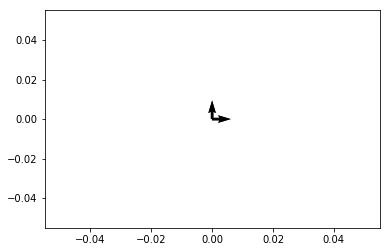

In [14]:
#
# This plot shows that the gradient of the angle is perpendicular to
# The vector Vij
#
import matplotlib.pyplot as plt
origin=[0,0]
plt.quiver(*origin,dvijdj[0], dvijdj[1])
plt.quiver(*origin,vij[0], vij[1])
plt.quiver(*origin,dvijdj[0], dvijdj[1])
plt.quiver(*origin,vij[0], vij[1])
plt.show()

In [15]:
-cos/rij*drijdj + vik/(rij*rik)

array([1.41421356, 0.70710678, 0.        ])

In [16]:
print(1.41421356/-0.5000053033499263)
print(0.70710678/-0.20710354891040336)


-2.828397120040684
-3.414266842457185


In [17]:
print(sin/-0.5000053033499263)
print(sin/1.41421356)


-1.4141985623934117
0.5000000008390157


In [167]:
# check for the derivative of cosine
#
# Let us change to a situation now where cos(theta) != 0
# Here, cos of theta is equal to 0.5
def f(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
s = 1e-6
xi = np.asarray([0,0,0], dtype=float)
xj = np.asarray([0.5,0,0], dtype=float)
xk = np.asarray([1/2,np.sqrt(3)/2,0], dtype=float)
vij = xj-xi
vik = xk-xi
vjk = xk-xj
rij = np.linalg.norm(vij)
rik = np.linalg.norm(vik)
rjk = np.linalg.norm(vjk)
drijdi = -(xj - xi) / rij
drijdj = -drijdi
drikdi = -(xk - xi) / rik
drikdk = -drikdi
drjkdj = -(xk-xj)/rjk
drjkdk = -drjkdj
cos = f(vij,vik)
dvijdj = []
dvikdk = []
print(cos)
for i in range(3):
    vijb = np.copy(vij)
    vijb[i] += s
    vikb = np.copy(vik)
    vikb[i] += s
    a = f(vij, vik)
    b = f(vijb,vik)
    num_dcos_j = (b - a)/s 
    a = f(vij, vik)
    b = f(vij,vikb)
    num_dcos_k = (b - a)/s 
    print("numerical dcos", num_dcos_j, num_dcos_k)
    dvijdj.append(num_dcos_j)
    dvikdk.append(num_dcos_k)    
dvijdj = np.asarray(dvijdj)
dvikdk = np.asarray(dvikdk)
print("Numerical dvijdj:", dvijdj)
print("Numerical dvikdk:", dvikdk)

0.5000000000000001
numerical dcos 0.0 0.7499994374438046
numerical dcos 1.732049807579017 -0.4330123895557314
numerical dcos -9.999778782798785e-07 -2.5002222514558525e-07
Numerical dvijdj: [ 0.00000000e+00  1.73204981e+00 -9.99977878e-07]
Numerical dvikdk: [ 7.49999437e-01 -4.33012390e-01 -2.50022225e-07]


In [154]:
print(drijdj)
print(drijdi)
print(drikdi)
print(drikdk)
print(drjkdj)
print(drjkdk)
print(rij, rik, rjk)
print(vij)

[1. 0. 0.]
[-1. -0. -0.]
[-0.5       -0.8660254 -0.       ]
[0.5       0.8660254 0.       ]
[-0. -1. -0.]
[0. 1. 0.]
0.5 0.9999999999999999 0.8660254037844386
[0.5 0.  0. ]


In [142]:
# check for the derivative of cosine
#
# Let us change to a situation now where cos(theta) != 0
def f(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
s = 1e-6
xi = np.asarray([0,0,0], dtype=float)
xj = np.asarray([1,0,0], dtype=float)
xk = np.asarray([1/2,np.sqrt(3)/2,0], dtype=float)
vij = xj-xi
vik = xk-xi
rij = np.linalg.norm(vij)
rik = np.linalg.norm(vik)
rjk = np.linalg.norm(xj-xk)
drijdi = -(xj - xi) / rij
drijdj = -drijdi
drikdi = -(xk - xi) / rik
drikdk = -drijdi
cos = f(vij,vik)
sin = np.sqrt(1-cos**2)
dcosdi = np.empty(3)
for i in range(3):
    xib = np.copy(xi)
    xib[i] += s
    vijb = xj-xib
    vikb = xk-xib
    a = f(vij, vik)
    b = f(vijb,vikb)
    dcosdi[i] = (b-a)/s
print("numerical dcos", dcosdi)
    

numerical dcos [-7.50000563e-01 -4.33012390e-01  4.99933428e-07]


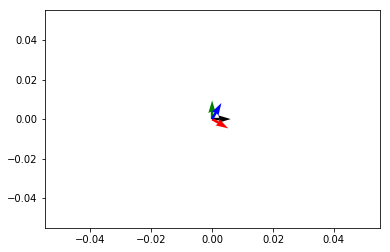

In [20]:
#
# This plot shows that the gradient of the angle is perpendicular to
# The vector Vij
#
import matplotlib.pyplot as plt
origin=[0,0]
plt.quiver(*origin,dvijdj[0], dvijdj[1], color='g')
plt.quiver(*origin,vij[0], vij[1])

plt.quiver(*origin,dvikdk[0], dvikdk[1], color='r')
plt.quiver(*origin,vik[0], vik[1], color='b')

plt.show()

In [73]:
npa = np.asarray
npl = np.linalg.norm
print()
obdcosdi = npa([-0.75000000026654590   ,-0.43301270266167102, 0.0])
obdcosdj = npa([2.6654589646568638E-010, 0.86602540439999998, 0.0])
obdcosdk = npa([0.75000000039981884    ,-0.43301270150749344, 0.0])




[2.66545896e-10 8.66025404e-01 0.00000000e+00]
[ 0.00000000e+00  8.66022904e-01 -2.50000021e-06]
[ 7.49994375e-01 -4.33009577e-01 -2.50000021e-06]
[-0.75      -0.4330127 -0.       ]
[-0.75      -0.4330127  0.       ]


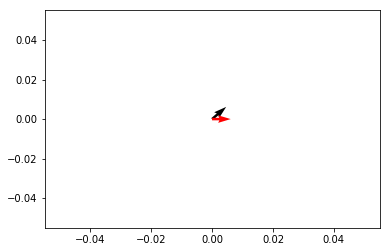

In [40]:
import matplotlib.pyplot as plt
origin=[0,0]
plt.quiver(*origin,obdcosdj[0], obdcosdj[1])
plt.quiver(*origin,vij[0], vij[1], color='r')
plt.show()

In [41]:
print(cos,rij,rik)

0.5000000000000001 1.0 0.9999999999999999


In [42]:
anal = -cos/rij*(rik*drijdj)+(xk-xi)/(rij*rik)
print(anal)

[1.        0.8660254 0.       ]


In [135]:
print((rij**2 + rik**2 - rjk**2)/(2.0*rij*rik))
print(cos)
print(np.sqrt(3)/2)

0.49999999999999994
0.5000000000000001
0.8660254037844386


In [155]:
(-cos/rij*(drijdj) + (xk-xi)/(rij*rik))*rij

array([0.       , 0.8660254, 0.       ])

In [80]:
print(np.cross(vij,np.cross(vij,xk-xj)))
print(dvijdj)
print(np.cross(vik,np.cross(vik,xj-xk)))
print(np.linalg.norm(np.cross(vij,np.cross(vij,xk-xj))/-sin))
eqops = -1 * (dvijdj + dvikdk)
print(eqops)
print(dcosdi)
print(np.linalg.norm(dcosdi))
print(np.linalg.norm(dcosdi))
print(np.linalg.norm(dvijdj))
print(np.linalg.norm(dvikdk))

[ 0.        -0.8660254 -0.       ]
[ 0.00000000e+00  8.66022904e-01 -2.50000021e-06]
[-0.75       0.4330127  0.       ]
1.0
[-7.49994375e-01 -4.33013327e-01  5.00000041e-06]
[-7.50005625e-01 -4.33009577e-01  5.00000041e-06]
0.8660287126990512
0.8660287126990512
0.8660229037485424
0.8660189699016453


In [52]:
print(dvijdj + dvikdk)

[ 7.49994375e-01  4.33013327e-01 -5.00000041e-06]


In [78]:
oi = npa([-0.75000000093291042,-1.2990381072925063,-0.0000000000000000 ])
oj = npa([5.3309157088676784E-010,1.7320508088000000,0.0000000000000000])
ok = npa([0.75000000039981884,-0.43301270150749355,0.0000000000000000])
print(np.linalg.norm(oi))
print(np.linalg.norm(oj))
print(np.linalg.norm(ok))

1.500000001865821
1.7320508088
0.866025403938329


In [165]:
# check for the derivative of cosine
#
# Let us change to a situation now where cos(theta) != 0
# Here, cos of theta is equal to 0.5
def f(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
s = 1e-6
xi = np.asarray([0,0,0], dtype=float)
xj = np.asarray([20,0,0], dtype=float)
xk = np.asarray([1/2,np.sqrt(3)/2,0], dtype=float)
vij = xj-xi
vik = xk-xi
vjk = xk-xj
rij = np.linalg.norm(vij)
rik = np.linalg.norm(vik)
rjk = np.linalg.norm(vjk)
drijdi = -(xj - xi) / rij
drijdj = -drijdi
drikdi = -(xk - xi) / rik
drikdk = -drikdi
drjkdj = -(xk-xj)/rjk
drjkdk = -drjkdj
cos = f(vij,vik)
dvijdj = []
dvikdk = []
print(cos)
for i in range(3):
    vijb = np.copy(vij)
    vijb[i] += s
    vikb = np.copy(vik)
    vikb[i] += s
    a = f(vij, vik)
    b = f(vijb,vik)
    num_dcos_j = (b - a)/s 
    a = f(vij, vik)
    b = f(vij,vikb)
    num_dcos_k = (b - a)/s 
    print("numerical dcos", num_dcos_j, num_dcos_k)
    dvijdj.append(num_dcos_j)
    dvikdk.append(num_dcos_k)    
dvijdj = np.asarray(dvijdj)
dvikdk = np.asarray(dvikdk)
print("Numerical dvijdj:", dvijdj)
print("Numerical dvikdk:", dvikdk)

0.5000000000000001
numerical dcos 0.0 0.7499994374438046
numerical dcos 0.043301269569973044 -0.43301238950022025
numerical dcos -6.661338147750939e-10 -2.5002222514558525e-07
Numerical dvijdj: [ 0.00000000e+00  4.33012696e-02 -6.66133815e-10]
Numerical dvikdk: [ 7.49999437e-01 -4.33012390e-01 -2.50022225e-07]
